### A/B тестирование рекламных кампаний для сайта

Ссылка на датасет: [Kaggle](https://www.kaggle.com/datasets/amirmotefaker/ab-testing-dataset)

Онлайн версия данного блокнота: [Google Colab](https://colab.research.google.com/drive/1zEWTI4VmwPp4WI40zMHeVjPAHu5V2K9Z?usp=sharing)

#### План
1. Выгрузить датасет
2. Провести разведочный анализ данных (EDA)
3. Подобрать метрики и провести тестирование
4. Сделать выводы, какая из кампаний оказалась успешнее

#### Описание столбцов в таблице датасета
  
| Столбец | Описание |
|---|---|
| Campaign Name | Название рекламной кампании (контрольная и тестовая) |
| Date | Дата замера |
| Spend | Затраты на кампанию (в долларах) |
| of Impressions | Количество показов |
| Reach | Количество уникальных пользователей, увидевших рекламу |
| of Website Clicks | Количество кликов по рекламе для перехода на сайт |
| of Searches | Количество пользователей, совершивших поисковый запрос на сайте |
| of View Content | Количество пользователей, посмотревших товары на сайте после поиска |
| of Add to Cart | Количество пользователей, добавивших товары в корзину |
| of Purchase | Количество покупок, успешно совершённых пользователями |

#### 1. Выгрузка и обработка датасета

##### Контрольная группа

In [27]:
# Игнорируем некритичные предупреждения python
from warnings import simplefilter
simplefilter("ignore")

# Выгружаем датасет контрольной группы
import pandas as pd

control = pd.read_csv('dataset/control_group.csv')

control.head()

,Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
0,Control Campaign;1.08.2019;2280;82702;56930;70...
1,Control Campaign;2.08.2019;1757;121040;102513;...
2,Control Campaign;3.08.2019;2343;131711;110862;...
3,Control Campaign;4.08.2019;1940;72878;61235;30...
4,Control Campaign;5.08.2019;1835;;;;;;;


In [28]:
# Нужно привести датасет к удобоваримому виду
columns_list = control.columns[0].split(';')

data = list(control["Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase"].apply(lambda x: x.split(';')))

In [29]:
control_group = pd.DataFrame(data, columns=columns_list)

control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,4.08.2019,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,5.08.2019,1835,,,,,,,


In [30]:
print(f"В контрольном датасете {control_group.shape[0]} строк и {control_group.shape[1]} столбцов")

В контрольном датасете 30 строк и 10 столбцов


In [31]:
print(f"В контрольном датасете {control_group.isna().sum().sum()} пустых значений и {control_group.duplicated().sum()} дубликатов")

В контрольном датасете 0 пустых значений и 0 дубликатов


In [32]:
# Даты нужно привести к привычному нам формату
control_group['Date'] = pd.to_datetime(control_group['Date'], format='%d.%m.%Y').dt.strftime('%d.%m.%Y')

# В некоторых строках есть пробелы вместо числовых значений, нужно заменить их на 0
control_group['Spend [USD]'] = control_group['Spend [USD]'].apply(lambda x: int(x) if x != '' else 0)
control_group['# of Impressions'] = control_group['# of Impressions'].apply(lambda x: int(x) if x != '' else 0)
control_group['Reach'] = control_group['Reach'].apply(lambda x: int(x) if x != '' else 0)
control_group['# of Website Clicks'] = control_group['# of Website Clicks'].apply(lambda x: int(x) if x != '' else 0)
control_group['# of Searches'] = control_group['# of Searches'].apply(lambda x: int(x) if x != '' else 0)
control_group['# of View Content'] = control_group['# of View Content'].apply(lambda x: int(x) if x != '' else 0)
control_group['# of Add to Cart'] = control_group['# of Add to Cart'].apply(lambda x: int(x) if x != '' else 0)
control_group['# of Purchase'] = control_group['# of Purchase'].apply(lambda x: int(x) if x != '' else 0)

control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,01.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,02.08.2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,03.08.2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,04.08.2019,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,05.08.2019,1835,0,0,0,0,0,0,0


In [33]:
# Краткая сводка по контрольному датасету
control_group.describe()

,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2288.433333,105907.766667,85883.433333,5143.433333,2147.266667,1879.000000,1256.666667,505.366667
std,367.334451,29228.406061,26894.781829,1981.299011,942.718883,842.421428,465.435749,205.342352
min,1757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1945.500000,91211.500000,69708.500000,4042.250000,1451.500000,1174.000000,913.500000,367.500000
50%,2299.500000,112368.000000,91418.000000,5082.500000,2340.000000,1979.500000,1279.000000,500.000000
75%,2532.000000,121259.000000,101958.750000,6609.500000,2655.000000,2360.500000,1638.000000,663.250000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


##### Тестовая группа

In [34]:
# Выгружаем датасет тестовой группы и проводим с ним те же операции, что и с предыдущим
test = pd.read_csv('dataset/test_group.csv')

test.head()

,Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
0,Test Campaign;1.08.2019;3008;39550;35820;3038;...
1,Test Campaign;2.08.2019;2542;100719;91236;4657...
2,Test Campaign;3.08.2019;2365;70263;45198;7885;...
3,Test Campaign;4.08.2019;2710;78451;25937;4216;...
4,Test Campaign;5.08.2019;2297;114295;95138;5863...


In [35]:
columns_list2 = test.columns[0].split(';')

data2 = list(test["Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase"].apply(lambda x: x.split(';')))

test_group = pd.DataFrame(data2, columns=columns_list2)

test_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [36]:
print(f"В тестовом датасете {test_group.shape[0]} строк и {test_group.shape[1]} столбцов")

В тестовом датасете 30 строк и 10 столбцов


In [37]:
print(f"В тестовом датасете {test_group.isna().sum().sum()} пустых значений и {test_group.duplicated().sum()} дубликатов")

В тестовом датасете 0 пустых значений и 0 дубликатов


In [38]:
test_group['Date'] = pd.to_datetime(test_group['Date'], format='%d.%m.%Y').dt.strftime('%d.%m.%Y')

test_group['Spend [USD]'] = test_group['Spend [USD]'].apply(lambda x: int(x) if x != '' else 0)
test_group['# of Impressions'] = test_group['# of Impressions'].apply(lambda x: int(x) if x != '' else 0)
test_group['Reach'] = test_group['Reach'].apply(lambda x: int(x) if x != '' else 0)
test_group['# of Website Clicks'] = test_group['# of Website Clicks'].apply(lambda x: int(x) if x != '' else 0)
test_group['# of Searches'] = test_group['# of Searches'].apply(lambda x: int(x) if x != '' else 0)
test_group['# of View Content'] = test_group['# of View Content'].apply(lambda x: int(x) if x != '' else 0)
test_group['# of Add to Cart'] = test_group['# of Add to Cart'].apply(lambda x: int(x) if x != '' else 0)
test_group['# of Purchase'] = test_group['# of Purchase'].apply(lambda x: int(x) if x != '' else 0)

test_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,01.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,02.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,03.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,04.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,05.08.2019,2297,114295,95138,5863,2106,858,956,768


#### 2. Разведочный анализ данных

Для начала проверим ежедневные и суммарные затраты на рекламные кампании и сравним их

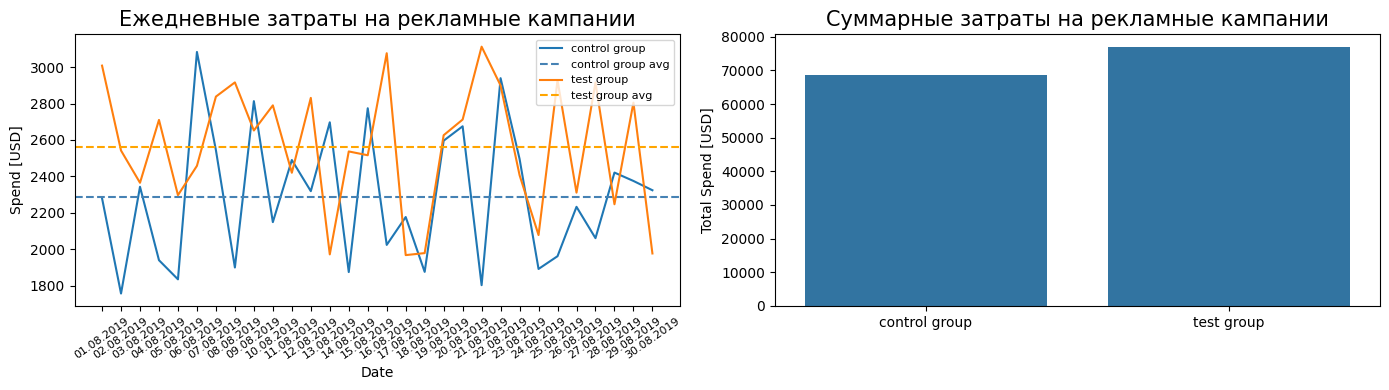

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_spend_value_control = control_group['Spend [USD]'].mean()
avg_spend_value_test = test_group['Spend [USD]'].mean()

total_spend_value_control = control_group['Spend [USD]'].sum()
total_spend_value_test = test_group['Spend [USD]'].sum()
x_spend = ['control group', 'test group']
y_spend = [total_spend_value_control, total_spend_value_test]

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,4))

ax1 = sns.lineplot(data=control_group, x='Date', y='Spend [USD]', label='control group', ax=ax1)
ax1.axhline(y=avg_spend_value_control, color='steelblue', ls='--', label='control group avg')

ax1 = sns.lineplot(data=test_group, x='Date', y='Spend [USD]', label='test group', ax=ax1)
ax1.axhline(y=avg_spend_value_test, ls='--', color='orange', label='test group avg')

ax1.set_title('Ежедневные затраты на рекламные кампании', size=15)
ax1.legend(fontsize=8, loc='upper right')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 35, size=8)

ax2 = sns.barplot(x=x_spend, y=y_spend)
ax2.set_ylabel('Total Spend [USD]')
ax2.set_title('Суммарные затраты на рекламные кампании', size=15)

plt.tight_layout()

По графику выше видно, что тестовая рекламная кампания обходится дороже контрольной.

Теперь проверим ежедневные и суммарные показы по рекламным кампаниям. Показ (Impression) считается каждый раз когда пользователь видит рекламу в приложении или в браузере.

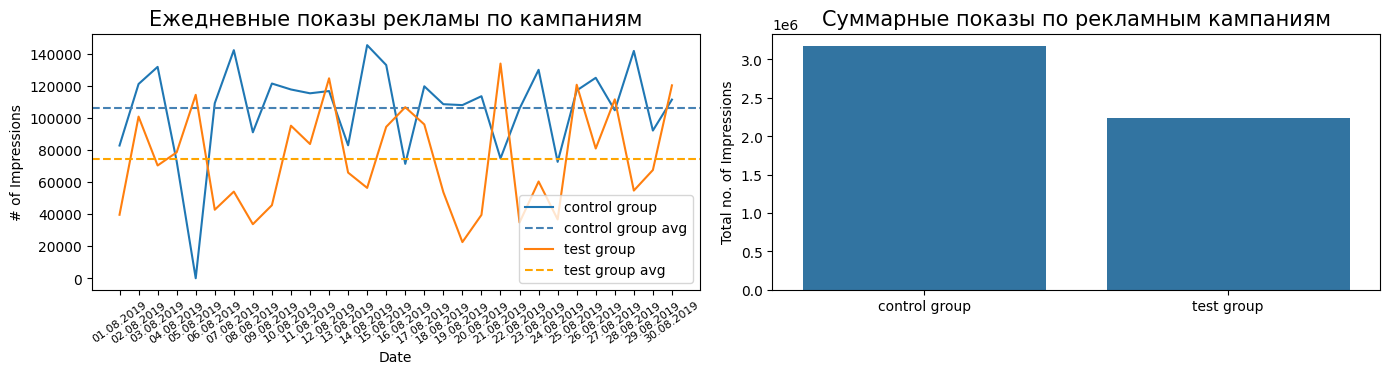

In [40]:
avg_impressions_control = control_group['# of Impressions'].mean()
avg_impressions_test = test_group['# of Impressions'].mean()

total_impressions_control = control_group['# of Impressions'].sum()
total_impressions_test = test_group['# of Impressions'].sum()
x_impressions = ['control group', 'test group']
y_impressions = [total_impressions_control, total_impressions_test]

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,4))

ax1 = sns.lineplot(data=control_group, x='Date', y='# of Impressions', label='control group', ax=ax1)
ax1.axhline(y=avg_impressions_control, color='steelblue', ls='--', label='control group avg')

ax1 = sns.lineplot(data=test_group, x='Date', y='# of Impressions', label='test group', ax=ax1)
ax1.axhline(y=avg_impressions_test, ls='--', color='orange', label='test group avg')

ax1.set_title('Ежедневные показы рекламы по кампаниям', size=15)
ax1.legend(fontsize=10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 35, size=8)

ax2 = sns.barplot(x=x_impressions, y=y_impressions)
ax2.set_ylabel('Total no. of Impressions')
ax2.set_title('Суммарные показы по рекламным кампаниям', size=15)

plt.tight_layout()

На графике выше видно, что контрольная рекламная кампания принесла больше показов, чем тестовая. Это ещё раз подтверждает, что контрольная кампания обошлась дешевле тестовой.

Осталось проверить количество успешных покупок по рекламным кампаниям.

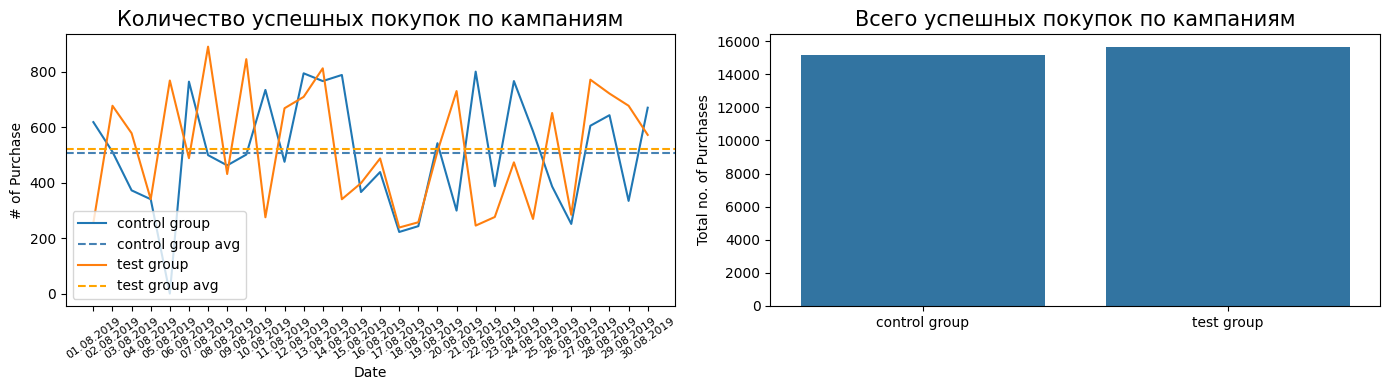

In [41]:
avg_purchase_control = control_group['# of Purchase'].mean()
avg_purchase_test = test_group['# of Purchase'].mean()

total_purchase_control = control_group['# of Purchase'].sum()
total_purchase_test = test_group['# of Purchase'].sum()
x_purchase = ['control group', 'test group']
y_purchase = [total_purchase_control, total_purchase_test]

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,4))

ax1 = sns.lineplot(data=control_group, x='Date', y='# of Purchase', label='control group', ax=ax1)
ax1.axhline(y=avg_purchase_control, color='steelblue', ls='--', label='control group avg')

ax1 = sns.lineplot(data=test_group, x='Date', y='# of Purchase', label='test group', ax=ax1)
ax1.axhline(y=avg_purchase_test, ls='--', color='orange', label='test group avg')

ax1.set_title('Количество успешных покупок по кампаниям', size=15)
ax1.legend(fontsize=10)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 35, size=8)

ax2 = sns.barplot(x=x_purchase, y=y_purchase)
ax2.set_ylabel('Total no. of Purchases')
ax2.set_title('Всего успешных покупок по кампаниям', size=15)

plt.tight_layout()

Теперь ситуация иная: количество успешных покупок почти не изменилось, а значит выводы об успешности кампаний делать пока рано.

##### Проверка данных на выбросы

Для проверки данных на выбросы применим метод IQR (Interquartile Range), который учитывает разницу между первым и третьим квартилями.

Сначала проверим датасет контрольной группы.

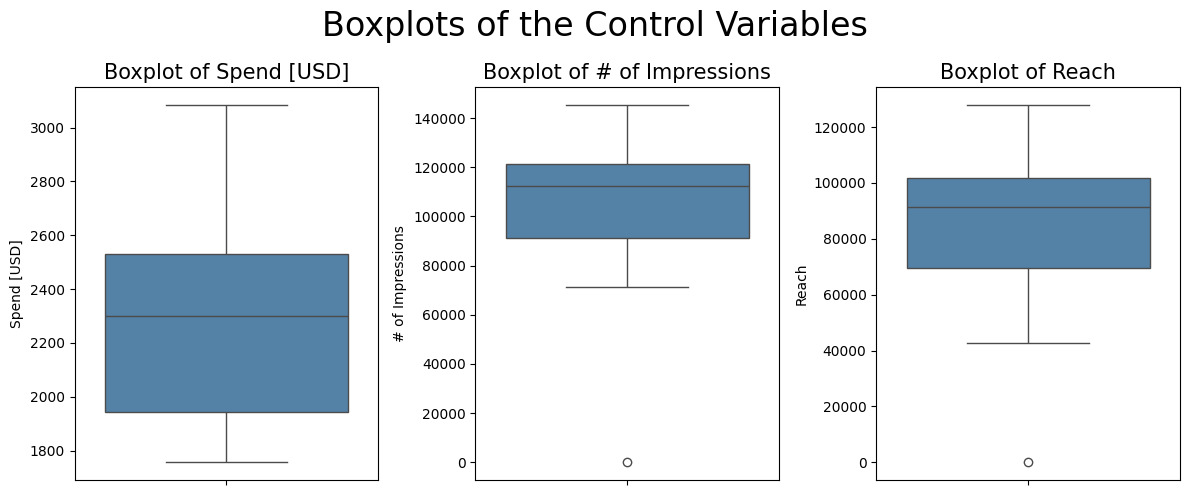

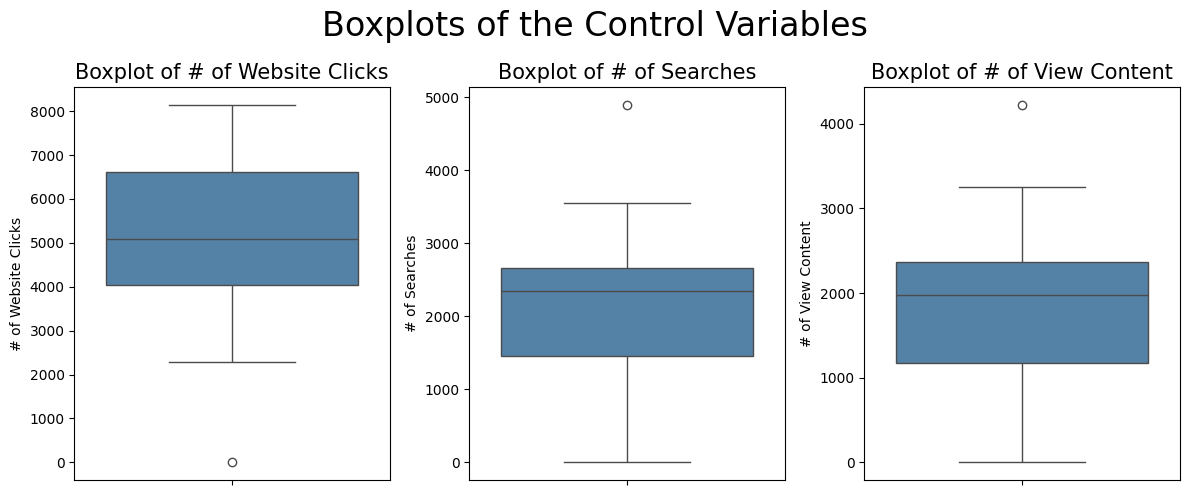

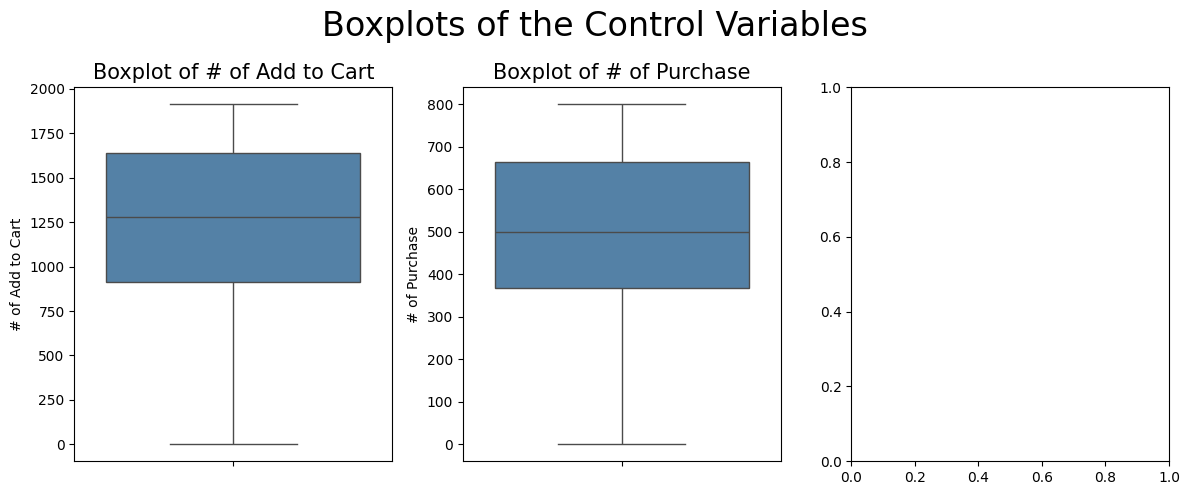

In [42]:
features = ['Spend [USD]', '# of Impressions', 'Reach', 
            '# of Website Clicks', '# of Searches', '# of View Content',
            '# of Add to Cart', '# of Purchase']


def plot_boxplots(data, grouptype, color):

    for i in range(3):

        fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))
        ax1 = sns.boxplot(data[features[i*3]], ax=ax1, color=color)
        ax1.set_title('Boxplot of '+str(features[i*3]), fontsize=15)
        ax2 = sns.boxplot(data[features[i*3+1]], ax=ax2, color=color)
        ax2.set_title('Boxplot of '+str(features[i*3+1]), fontsize=15)
        if i < 2:
            ax3 = sns.boxplot(data[features[i*3+2]], ax=ax3, color=color)
            ax3.set_title('Boxplot of '+str(features[i*3+2]), fontsize=15)
    
        fig.suptitle(f"Boxplots of the {grouptype} Variables", fontsize=24)    
    
        plt.tight_layout()


plot_boxplots(control_group, 'Control', 'steelblue')

В датасете контрольной группы присутствуют выбросы. Нужно проверить их процентное соотношение к соответствующим столбцам.

In [43]:
import numpy as np
 
def outliers_percentage(data):

    outliers_perc = []

    for k,v in data.items():
        # Столбец должен быть с типом числа, а не объекта
        if data[k].dtype != 'O':
            q1 = v.quantile(0.25)
            q3 = v.quantile(0.75)
            irq = q3 - q1
            v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
            perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
            out_tuple = (k,int(perc))
            outliers_perc.append(out_tuple)
            print("Column %s outliers = %.2f%%" % (k,perc))

outliers_percentage(control_group)

Column Spend [USD] outliers = 0.00%
Column # of Impressions outliers = 3.33%
Column Reach outliers = 3.33%
Column # of Website Clicks outliers = 3.33%
Column # of Searches outliers = 3.33%
Column # of View Content outliers = 3.33%
Column # of Add to Cart outliers = 0.00%
Column # of Purchase outliers = 0.00%


Процентное соотношение выбросов довольное низкое, их можно удалить без ущерба для анализа.

In [44]:
def remove_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data


capped_control_group = control_group.copy()
capped_test_group = test_group.copy()

for col in features:

    capped_control_group = remove_outliers_iqr(capped_control_group, col)
    capped_test_group = remove_outliers_iqr(capped_test_group, col)

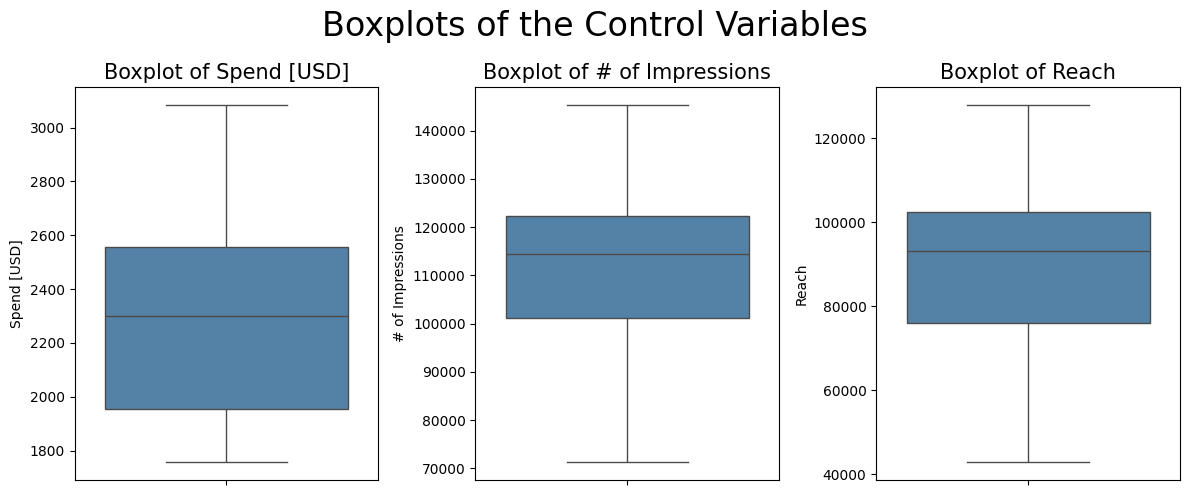

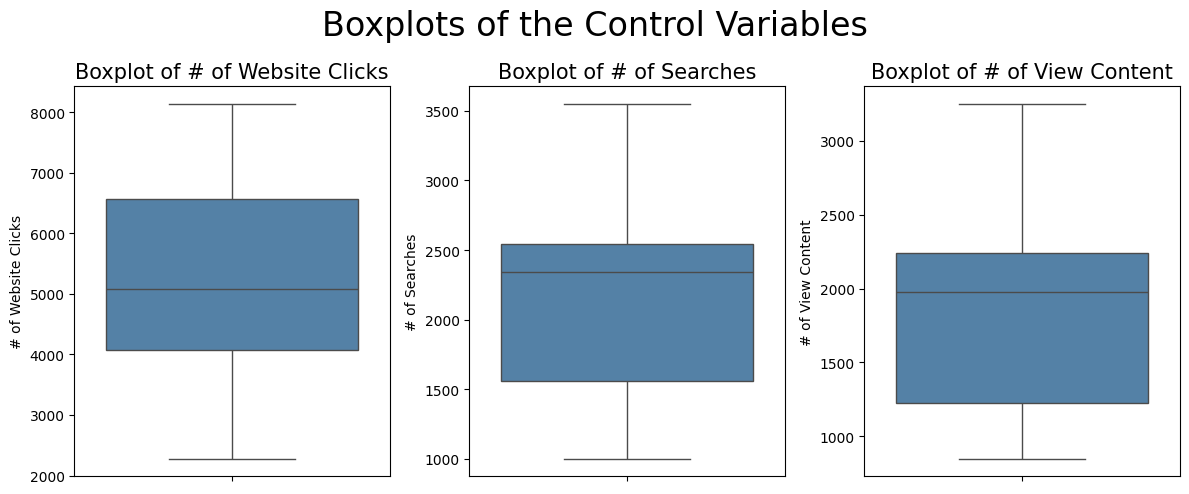

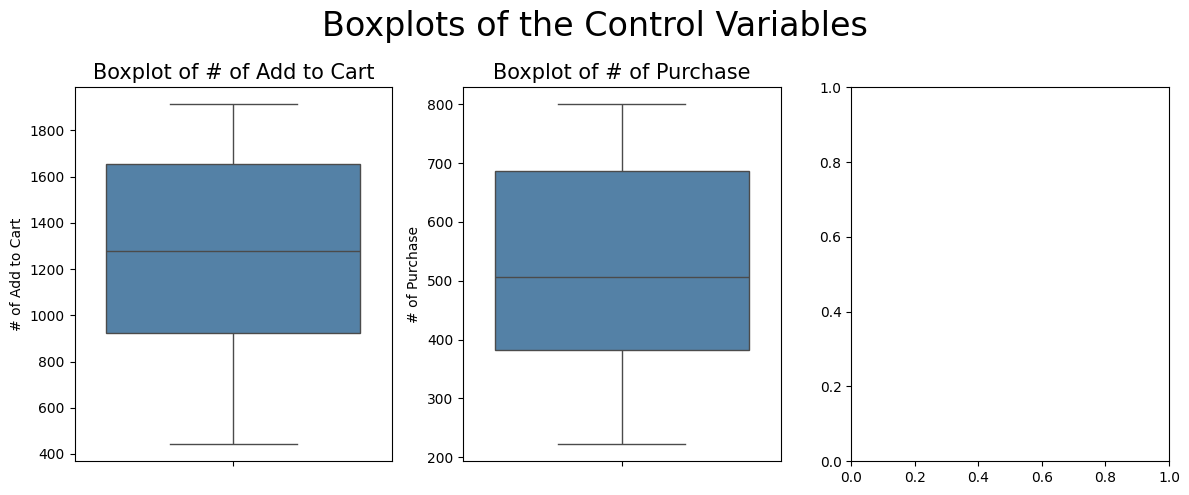

In [45]:
plot_boxplots(capped_control_group, 'Control', 'steelblue')

Теперь проделаем то же самое для тестовой кампании.

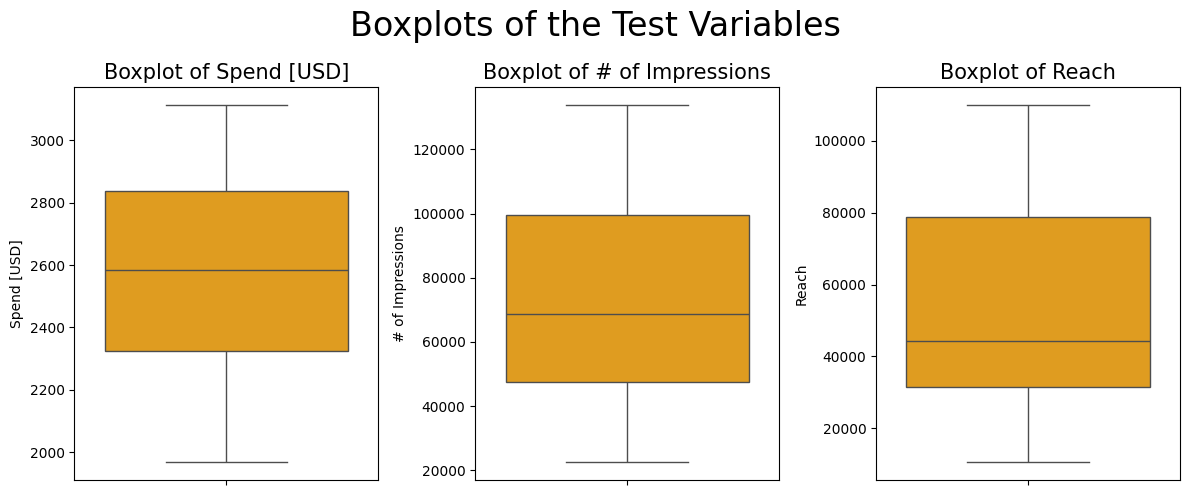

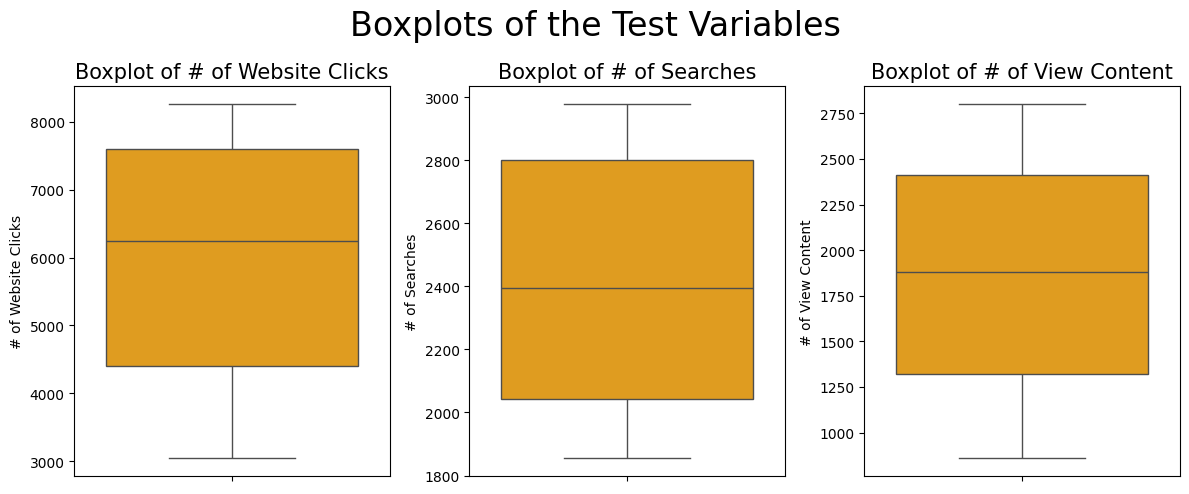

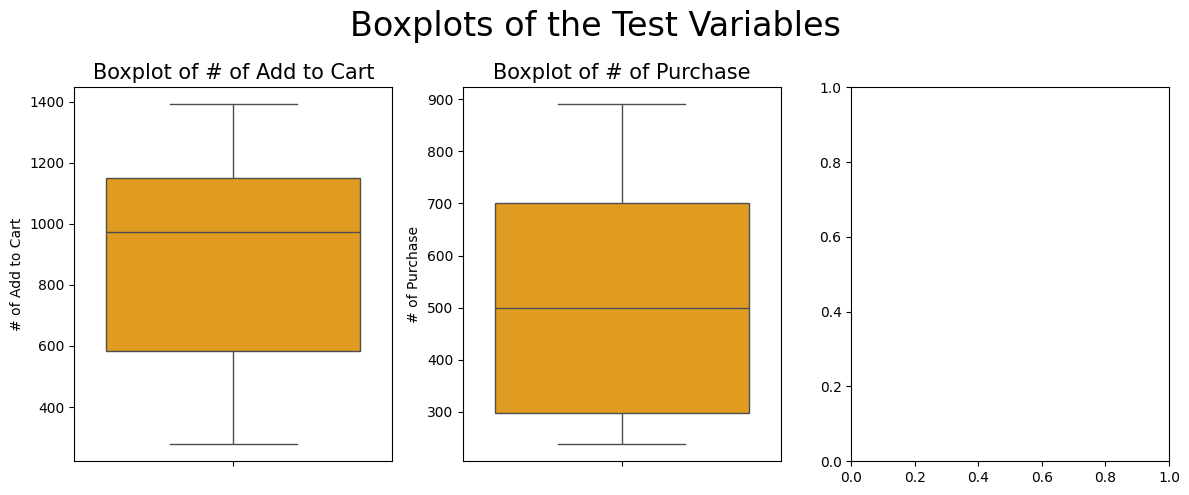

In [46]:
plot_boxplots(capped_test_group, 'Test', 'orange')

В датасете тестовой группы нет выбросов, можно пропустить остальные шаги.

#### 3. Выбор метрик и тестирование

Для оценки успешности рекламных кампаний подойдут следующие метрики:

1. Конверсия (Conversion Rate)
2. Стоимость клика (Cost per Click)
3. Стоимость покупки (Cost per Purchase)
4. Кликабельность (CTR, click-through rate)

In [47]:
# Conversion Rate
capped_control_group['Conversion Rate'] = capped_control_group['# of Purchase'] / capped_control_group['# of Website Clicks']
capped_test_group['Conversion Rate'] = capped_test_group['# of Purchase'] / capped_test_group['# of Website Clicks']

# Cost per Click
capped_control_group['Cost per Click'] = capped_control_group['Spend [USD]'] / capped_control_group['# of Website Clicks']
capped_test_group['Cost per Click'] = capped_test_group['Spend [USD]'] / capped_test_group['# of Website Clicks']

# Cost per Purchase
capped_control_group['Cost per Purchase'] = capped_control_group['Spend [USD]'] / capped_control_group['# of Purchase']
capped_test_group['Cost per Purchase'] = capped_test_group['Spend [USD]'] / capped_test_group['# of Purchase']

# Click-through Rate
capped_control_group['Click-through Rate'] = capped_control_group['# of Website Clicks'] / capped_control_group['# of Impressions']
capped_test_group['Click-through Rate'] = capped_test_group['# of Website Clicks'] / capped_test_group['# of Impressions']

capped_control_group.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase,Conversion Rate,Cost per Click,Cost per Purchase,Click-through Rate
0,Control Campaign,01.08.2019,2280,82702,56930,7016,2290,2159,1819,618,0.088084,0.324971,3.689320,0.084835
1,Control Campaign,02.08.2019,1757,121040,102513,8110,2033,1841,1219,511,0.063009,0.216646,3.438356,0.067003
2,Control Campaign,03.08.2019,2343,131711,110862,6508,1737,1549,1134,372,0.057160,0.360018,6.298387,0.049411
3,Control Campaign,04.08.2019,1940,72878,61235,3065,1042,982,1183,340,0.110930,0.632953,5.705882,0.042057
5,Control Campaign,06.08.2019,3083,109076,87998,4028,1709,1249,784,764,0.189672,0.765392,4.035340,0.036928


##### Проверка метрик на нормальное распределение

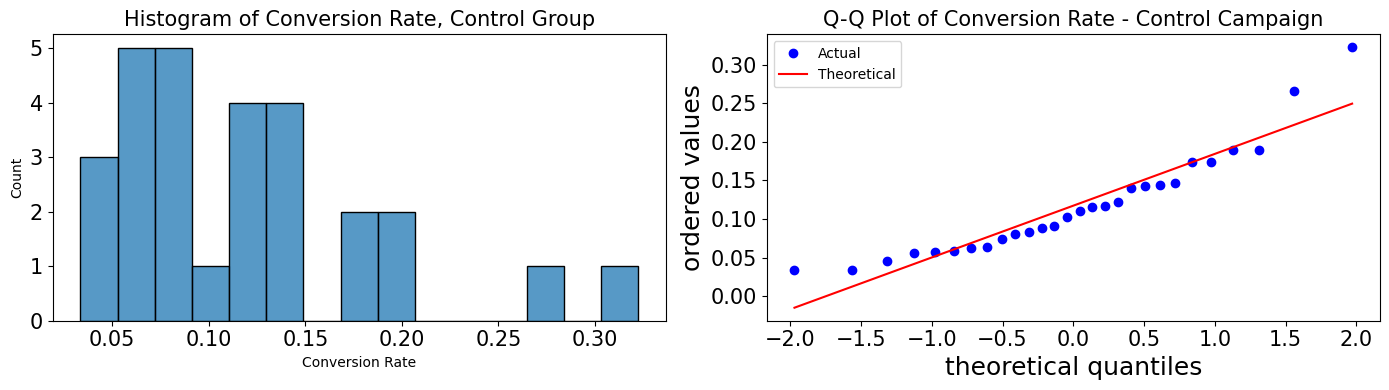

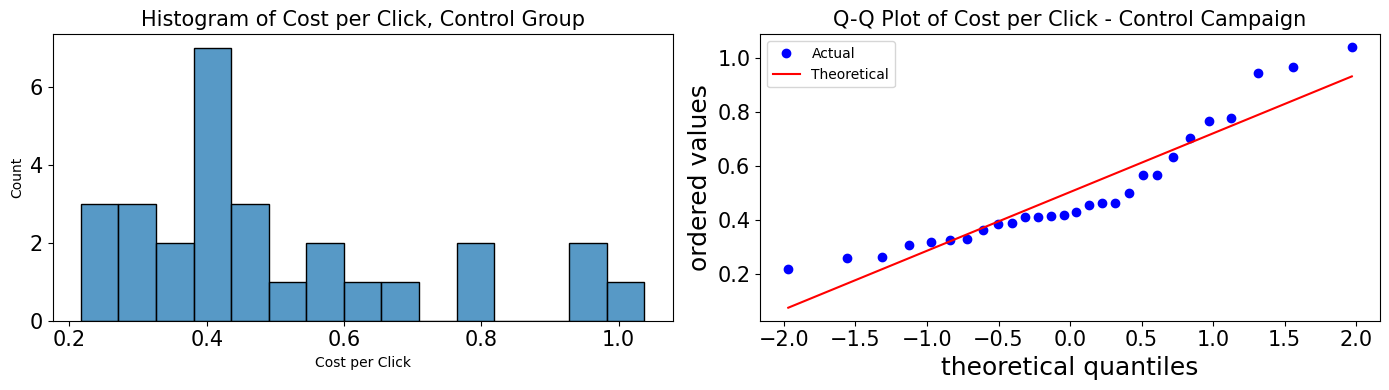

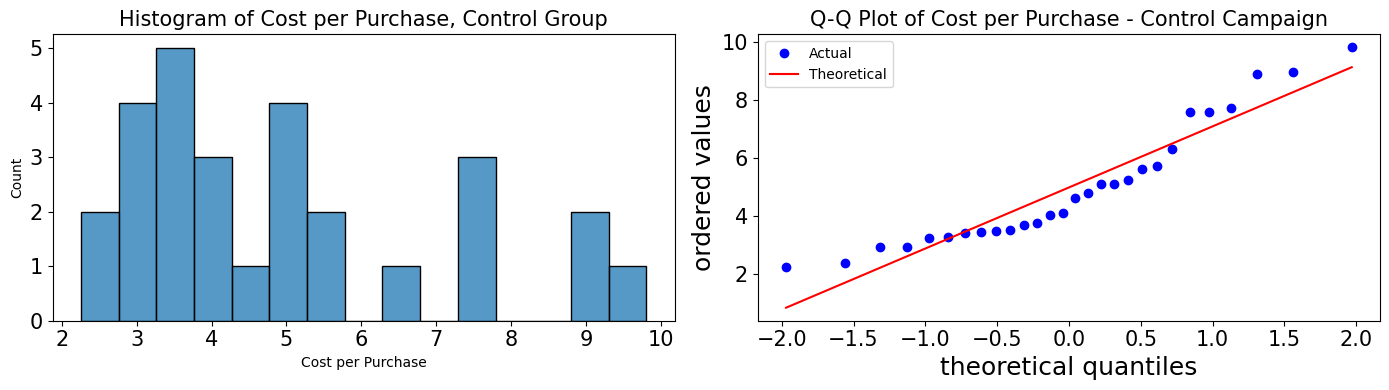

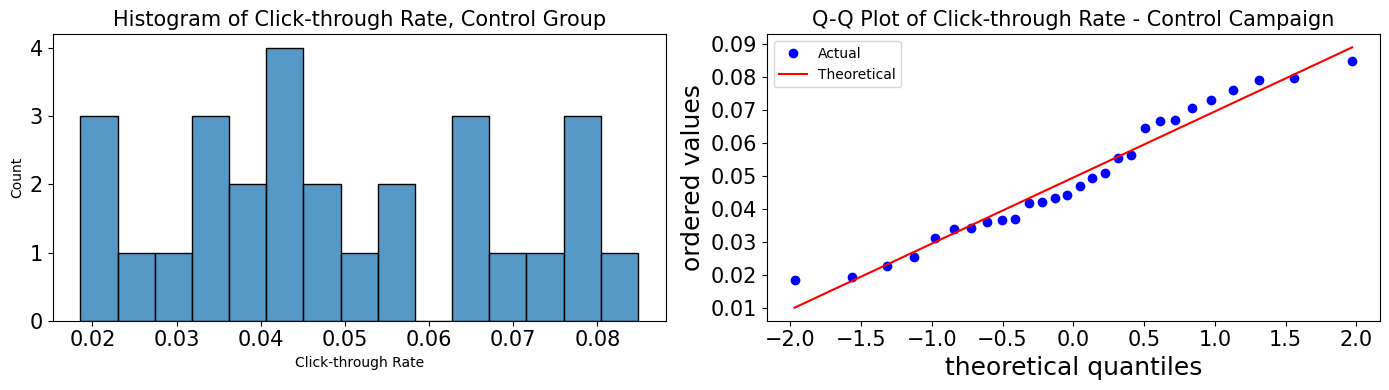

In [53]:
from scipy import stats

metrics = ['Conversion Rate', 'Cost per Click', 'Cost per Purchase', 'Click-through Rate']

for metric in metrics:

    fig,axes = plt.subplots(1,2,figsize=(14,4))

    axes[0] = sns.histplot(capped_control_group[metric], bins=15, ax=axes[0])
    axes[0].xaxis.set_tick_params(labelsize=15)
    axes[0].yaxis.set_tick_params(labelsize=15)
    axes[0].set_title(f"Histogram of {metric}, Control Group",fontsize=15)

    axes[1] = stats.probplot(capped_control_group[metric], dist="norm", plot=plt)
    plt.legend(['Actual','Theoretical'])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("theoretical quantiles", fontsize=18)
    plt.ylabel('ordered values', fontsize=18)
    plt.title(f"Q-Q Plot of {metric} - Control Campaign", fontsize=15)

    plt.tight_layout()

Графики показывают, что метрики не имеют нормального распределения. Это может быть объяснено малой выборкой, ограниченной одним месяцем.

##### Тест Шапиро-Уилка

Дополнительно проверим нормальное распределение метрик с помощью критерия Шапиро-Уилка. Нулевая гипотеза такова: метрики имеют нормальное распределение.

In [49]:
from scipy.stats import shapiro

for metric in metrics:

    print(f'\n{metric}:')

    test_stat, pvalue = shapiro(capped_control_group[metric])
    print('Control Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

    test_stat, pvalue = shapiro(capped_test_group[metric])
    print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))


Conversion Rate:
Control Stat = 0.8978, p-value = 0.0102
Test Stat = 0.9255, p-value = 0.0373

Cost per Click:
Control Stat = 0.8821, p-value = 0.0045
Test Stat = 0.9114, p-value = 0.0162

Cost per Purchase:
Control Stat = 0.9008, p-value = 0.0119
Test Stat = 0.8966, p-value = 0.0069

Click-through Rate:
Control Stat = 0.9543, p-value = 0.2531
Test Stat = 0.8409, p-value = 0.0004


Все метрики, кроме CTR в контрольной группе, имеют p-value меньше 0.05, то есть для них нулевая гипотеза отвергается - эти метрики не имеют нормального распределения.

##### Сравнение метрик контрольной и тестовой рекламных кампаний

Проведём сравнение ежедневных и средних значений метрик контрольной и тестовой групп

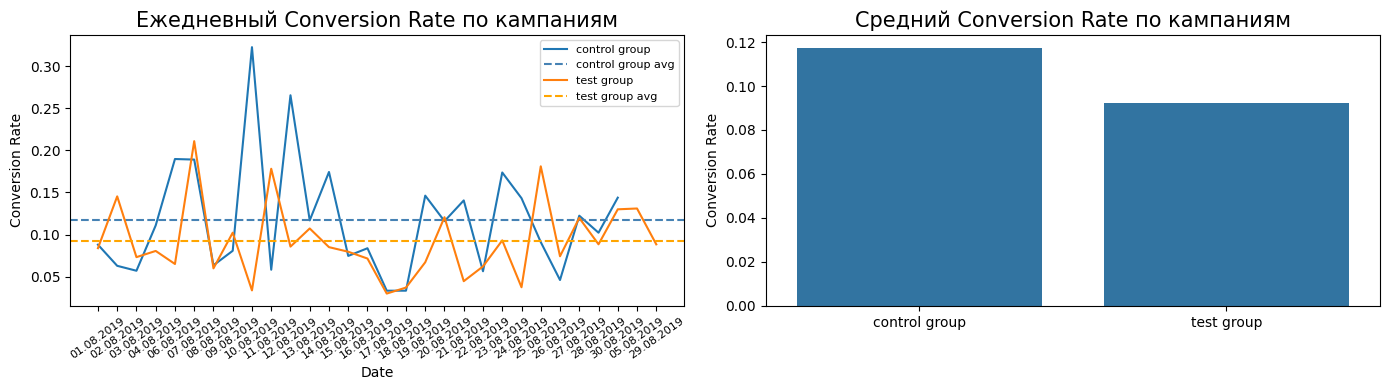

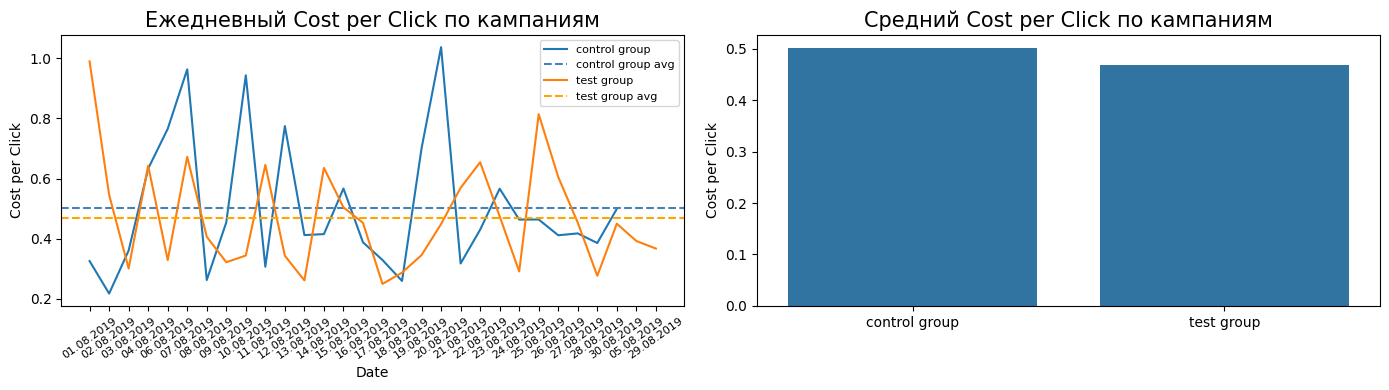

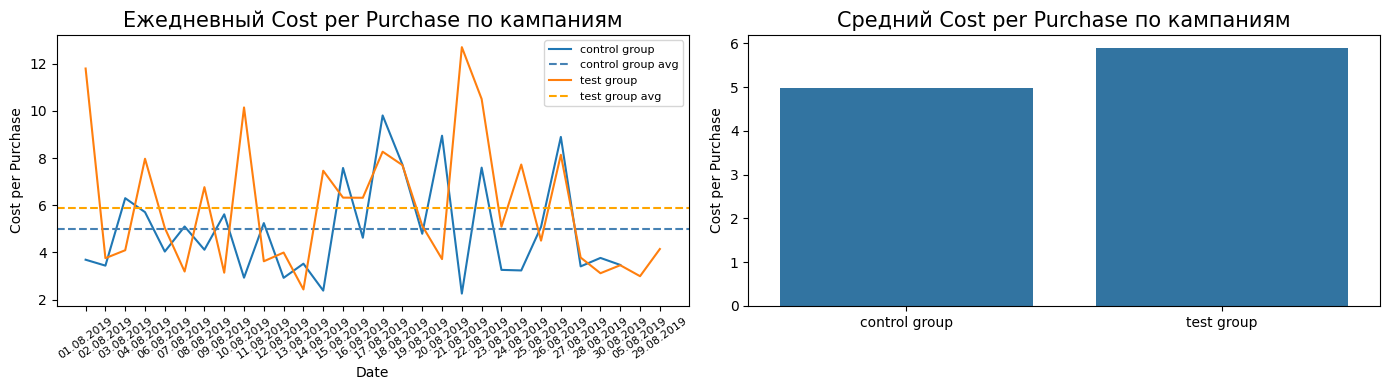

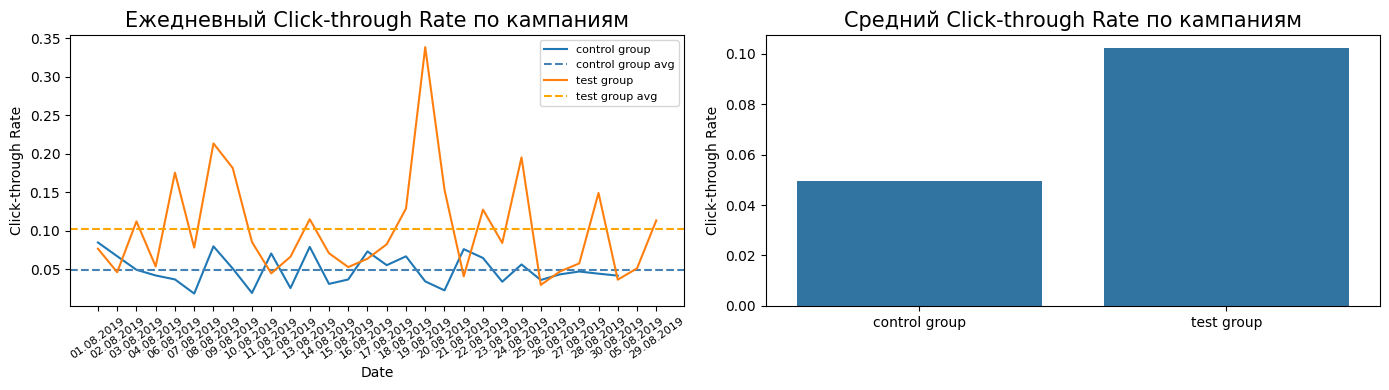

In [55]:
for metric in metrics:

    avg_control_metric = capped_control_group[metric].mean()
    avg_test_metric    = capped_test_group[metric].mean()
    x_metric = ['control group', 'test group']
    y_metric = [avg_control_metric, avg_test_metric]

    fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(14,4))

    ax1 = sns.lineplot(data=capped_control_group, x='Date', y=metric, label='control group', ax=ax1)
    ax1.axhline(y=avg_control_metric, color='steelblue', ls='--', label='control group avg')

    ax1 = sns.lineplot(data=capped_test_group, x='Date', y=metric, label='test group', ax=ax1)
    ax1.axhline(y=avg_test_metric, ls='--', color='orange', label='test group avg')

    ax1.set_title(f'Ежедневный {metric} по кампаниям', size=15)
    ax1.legend(fontsize=8)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 35, size=8)

    ax2 = sns.barplot(x=x_metric, y=y_metric)
    ax2.set_ylabel(f'{metric}')
    ax2.set_title(f'Средний {metric} по кампаниям', size=15)

    plt.tight_layout()

Что можно подметить из графиков:
- В случае Cost per Click разница в средних значения между контрольной и тестовой группами невелика
- Для Conversion Rate и Cost per Purchase разница в средних значения контрольной и тестовой групп тоже невелика
- Иная картина с CTR - разница между контрольной и тестовой группами по этой метрике довольно большая

##### Тест Левене

С помощью критерия Левене мы проверим значения на однородость (гомогенность). Нулевая гепотеза такова: дисперсии в двух выборках не имеют значимых различий.

In [56]:
for metric in metrics:
    levene_test = stats.levene(capped_control_group[metric], capped_test_group[metric])
    print(f"\nТест Левене на гомогенность: {metric}")
    print(f"Statistic = {levene_test.statistic}, p-value = {levene_test.pvalue}")


Тест Левене на гомогенность: Conversion Rate
Statistic = 3.3102851848423023, p-value = 0.07419480287654961

Тест Левене на гомогенность: Cost per Click
Statistic = 0.30735579995268336, p-value = 0.5815147351477551

Тест Левене на гомогенность: Cost per Purchase
Statistic = 1.7399012133302252, p-value = 0.19251977722634164

Тест Левене на гомогенность: Click-through Rate
Statistic = 9.938599305698453, p-value = 0.00260030064110904


Для всех метрик, кроме CTR, нулевая гипотеза не отвергается - эти метрики не имеют значимых различий между контрольной и тестовой группами.

Для CTR нулевая гипотеза отвергается - эта метрика имеет значимые различия между тестовой и контрольной группами.

##### t-Тест

Учитывая малый размер выборки, можно применить t-тест для проверки гипотез об успешности рекламных кампаний, однако с оговоркой, что метрики не имеют нормального распределения.

Гипотезы:

**Нулевая гипотеза (H0)** - нет значимой разницы между контрольной и тестовой группами

**Альтернативная гипотеза (H1)** - есть значимая разница между контрольной и тестовой группами

In [57]:
for metric in metrics:

    print(f'\n{metric}:')
    t_stat, p_value = stats.ttest_ind(capped_control_group[metric], capped_test_group[metric])
    print(f"T-statistic: {t_stat}, P-value: {p_value}")


Conversion Rate:
T-statistic: 1.6717099553710586, P-value: 0.10016095191704837

Cost per Click:
T-statistic: 0.6346799573036067, P-value: 0.52822174114737

Cost per Purchase:
T-statistic: -1.40447638039896, P-value: 0.16569945206493378

Click-through Rate:
T-statistic: -3.9722861929198148, P-value: 0.00020545736559049221


Только CTR показывает статистически значимую разницу между контрольной и тестовой группами.

Соответственно, альтернативную гипотеза отвергается и **принимается нулевая**.

##### U-критерий Манна-Уитни

Так как некорректно использовать t-тест с метриками без нормального распределения, можно попробовать применить непараметрический U-критерий Манна-Уитни.

In [58]:
for metric in metrics:

    print(f'\n{metric}:')
    print(stats.mannwhitneyu(capped_control_group[metric], capped_test_group[metric]))


Conversion Rate:
MannwhitneyuResult(statistic=np.float64(499.0), pvalue=np.float64(0.22189553147773622))

Cost per Click:
MannwhitneyuResult(statistic=np.float64(445.0), pvalue=np.float64(0.7030299918355747))

Cost per Purchase:
MannwhitneyuResult(statistic=np.float64(342.0), pvalue=np.float64(0.22783958084713474))

Click-through Rate:
MannwhitneyuResult(statistic=np.float64(175.0), pvalue=np.float64(0.00014205949265144692))


Наблюдается такая же картина, как и в прошлом тесте: все метрики, кроме CTR, не имеют статистически значимой разницы между контрольной и тестовой группами.

### 4. Выводы

По итогам тестирования, мы можем утверждать, что:
- Разница в **Conversion Rate** между контрольной и тестовой группами **НЕ ЯВЛЯЕТСЯ** статистически значимой
- Разница в **Cost per Click** между контрольной и тестовой группами **НЕ ЯВЛЯЕТСЯ** статистически значимой
- Разница в **Cost per Purchase** между контрольной и тестовой группами **НЕ ЯВЛЯЕТСЯ** статистически значимой
- Разница в **Click-through Rate** между контрольной и тестовой группами **ЯВЛЯЕТСЯ** статистически значимой

Отсюда следует, что тестовая рекламная кампания не оказала значительного влияния на конверсию, стоимость клика и стоимость покупки. 

**Главный вывод:** тестовая рекламная кампания не была успешнее контрольной и не дала явных преимуществ.